In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
import numpy as np
from shapely.geometry import Point
pd.set_option('display.max_columns', None)

In [40]:
data = pd.read_csv('nyc_census.csv', dtype={'GEOID20': str})
data.head()

,census,county,state,income,population,tract,GEOID20,OBJECTID_1,OBJECTID,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,HRS2020,RHRS20,Shape_Leng,Shape_Area,EQINTER20,area
0,92.02,Kings County,New York,827.0,3453.0,9202,36047009202,8876,10858,56624.0,0.0,40.644652,-73.998238,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.009992,0.000006,3,56625
1,94.01,Kings County,New York,484.0,2293.0,9401,36047009401,8901,10896,75483.0,0.0,40.644022,-74.002481,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.011616,0.000008,3,75483
2,94.02,Kings County,New York,631.0,2746.0,9402,36047009402,8875,10857,75543.0,0.0,40.642691,-74.000278,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.011615,0.000008,3,75544
3,96.00,Kings County,New York,1273.0,5858.0,9600,36047009600,8355,10264,150752.0,0.0,40.646015,-74.005785,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.016759,0.000016,3,150750
4,98.00,Kings County,New York,1247.0,6021.0,9800,36047009800,8356,10265,151006.0,0.0,40.643776,-74.008115,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.016761,0.000016,3,151005


In [41]:
data.shape

(2029, 21)

In [42]:
Coll_Freq_Sec = pd.read_csv('DSNY_Collection_Frequency_geo_bySec.csv')
Coll_Freq_Sec.head()

,Borough,Extracted_District,SECTION,Count_FREQ_TOTAL,geometry,point_count
0,Queens,14,QE141,2,"MULTIPOLYGON (((-73.8428890669 40.5741971688, ...",70.0
1,Brooklyn,5,BKN051,3,"MULTIPOLYGON (((-73.8847034837 40.6722342021, ...",25.0
2,Queens,11,QE113,2,"MULTIPOLYGON (((-73.7923653652 40.7530196389, ...",9.0
3,Brooklyn,12,BKS121,3,"MULTIPOLYGON (((-73.9982649635 40.6360058696, ...",27.0
4,Bronx,11,BX111,3,"MULTIPOLYGON (((-73.8542483533 40.8538320914, ...",39.0


In [43]:
Sec_geo = Coll_Freq_Sec.drop(columns = ['Count_FREQ_TOTAL','point_count'])
Sec_geo.head()

,Borough,Extracted_District,SECTION,geometry
0,Queens,14,QE141,"MULTIPOLYGON (((-73.8428890669 40.5741971688, ..."
1,Brooklyn,5,BKN051,"MULTIPOLYGON (((-73.8847034837 40.6722342021, ..."
2,Queens,11,QE113,"MULTIPOLYGON (((-73.7923653652 40.7530196389, ..."
3,Brooklyn,12,BKS121,"MULTIPOLYGON (((-73.9982649635 40.6360058696, ..."
4,Bronx,11,BX111,"MULTIPOLYGON (((-73.8542483533 40.8538320914, ..."


In [44]:
Sec_geo['geometry'] = Sec_geo['geometry'].apply(wkt.loads)
# Create a GeoDataFrame using the geometry column with WGS 84 CRS (EPSG:4326)
Sec_geo= gpd.GeoDataFrame(Sec_geo, crs="EPSG:4326", geometry='geometry')
Sec_geo.head()

,Borough,Extracted_District,SECTION,geometry
0,Queens,14,QE141,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ..."
1,Brooklyn,5,BKN051,"MULTIPOLYGON (((-73.88470 40.67223, -73.88476 ..."
2,Queens,11,QE113,"MULTIPOLYGON (((-73.79237 40.75302, -73.79229 ..."
3,Brooklyn,12,BKS121,"MULTIPOLYGON (((-73.99826 40.63601, -73.99839 ..."
4,Bronx,11,BX111,"MULTIPOLYGON (((-73.85425 40.85383, -73.85422 ..."


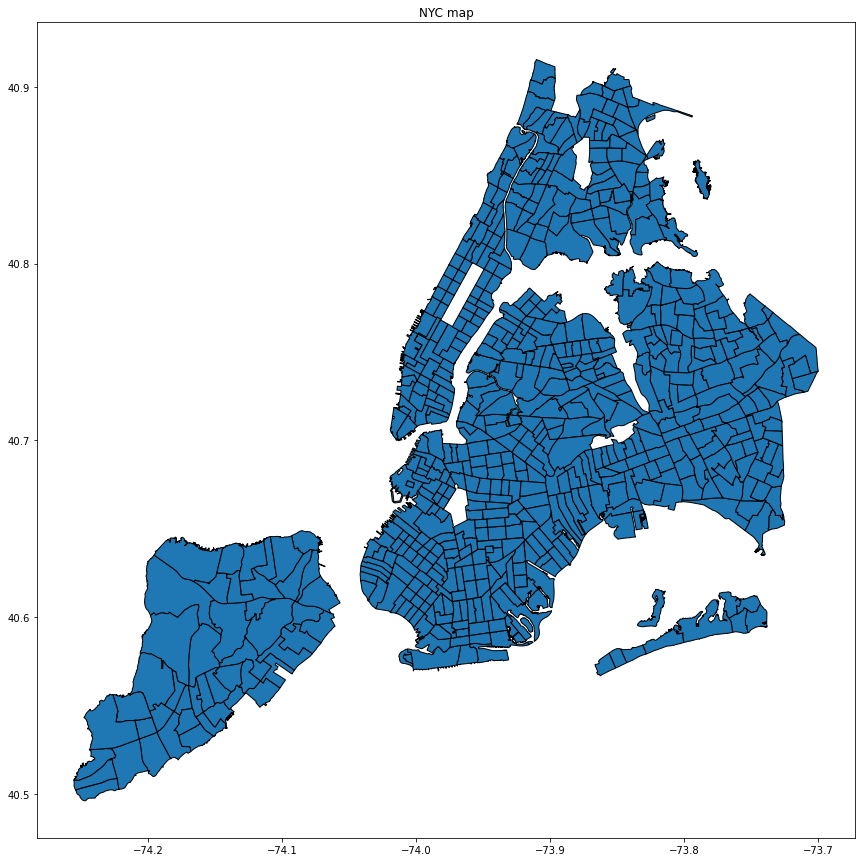

In [45]:
fig, ax = plt.subplots(figsize=(15, 15))
Sec_geo.plot(ax=ax, legend=True, edgecolor='black')
plt.title('NYC map')
plt.axis('on')
plt.show()

In [46]:
data['geometry'] = data.apply(lambda x: Point(float(x['INTPTLON20']), float(x['INTPTLAT20'])), axis=1)
data_gdf = gpd.GeoDataFrame(data, geometry='geometry')

In [47]:
merged_data = gpd.sjoin(Sec_geo, data_gdf, how='inner', op='intersects')

/Users/zhiyixie/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/kh/5wsy3kls2lv8pbt2n4c7b6pw0000gn/T/ipykernel_70903/2220006727.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data = gpd.sjoin(Sec_geo, data_gdf, how='inner', op='intersects')


In [48]:
merged_data.head()

,Borough,Extracted_District,SECTION,geometry,index_right,census,county,state,income,population,tract,GEOID20,OBJECTID_1,OBJECTID,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,HRS2020,RHRS20,Shape_Leng,Shape_Area,EQINTER20,area
0,Queens,14,QE141,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",1653,934.02,Queens County,New York,948.0,4269.0,93402,36081093402,7770,9597,394743.0,460266.0,40.575630,-73.840286,35620.0,"New York-Newark-Jersey City, N",2.010533,2.0,0.045882,0.000091,2,855011
0,Queens,14,QE141,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",1654,938.00,Queens County,New York,817.0,5176.0,93800,36081093800,8576,10528,809668.0,1300951.0,40.579763,-73.829327,35620.0,"New York-Newark-Jersey City, N",3.000000,3.0,0.064095,0.000224,3,2110619
0,Queens,14,QE141,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",1652,934.01,Queens County,New York,838.0,3851.0,93401,36081093401,7769,9596,542009.0,554670.0,40.581373,-73.846584,35620.0,"New York-Newark-Jersey City, N",2.000000,2.0,0.056440,0.000117,2,1096682
1,Brooklyn,5,BKN051,"MULTIPOLYGON (((-73.88470 40.67223, -73.88476 ...",1003,1166.00,Kings County,New York,758.0,2992.0,116600,36047116600,7758,9579,159390.0,0.0,40.674563,-73.882205,35620.0,"New York-Newark-Jersey City, N",4.000000,4.0,0.016551,0.000017,4,159391
1,Brooklyn,5,BKN051,"MULTIPOLYGON (((-73.88470 40.67223, -73.88476 ...",1062,1192.00,Kings County,New York,721.0,3043.0,119200,36047119200,7719,9536,225444.0,0.0,40.677110,-73.878157,35620.0,"New York-Newark-Jersey City, N",3.992823,4.0,0.019598,0.000024,4,225443


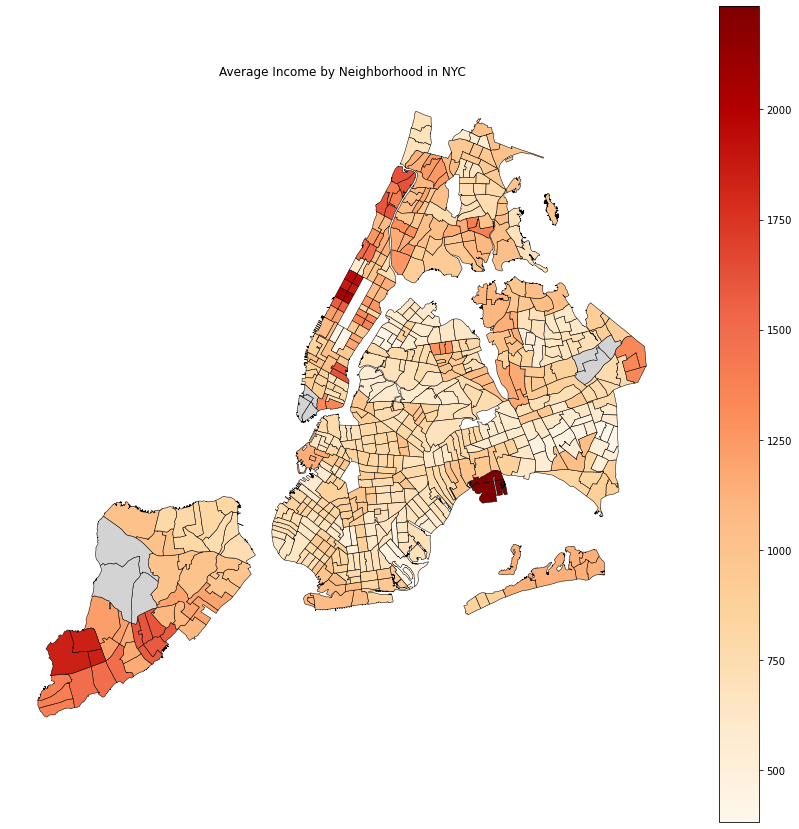

In [49]:
income = merged_data.groupby('SECTION')['income'].mean().reset_index()
Sec_geo = Sec_geo.merge(income, on='SECTION', how='left')
# neighborhoods['income'] = neighborhoods['income'].fillna(-1)
fig, ax = plt.subplots(figsize=(15, 15))
Sec_geo.plot(ax=ax, column='income', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Average Income by Neighborhood in NYC')
plt.axis('off')
plt.show()

In [50]:
building = pd.read_csv('nyc_pluto_24v1_csv/pluto_24v1_1.csv', dtype={'bct2020':str, 'bctcb2020': str})
building.head()

/var/folders/kh/5wsy3kls2lv8pbt2n4c7b6pw0000gn/T/ipykernel_70903/779121095.py:1: DtypeWarning: Columns (21,22,24,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  building = pd.read_csv('nyc_pluto_24v1_csv/pluto_24v1_1.csv', dtype={'bct2020':str, 'bctcb2020': str})


,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,QN,798,31,401.0,4012301,40123012006,123.01,2006.0,30.0,22.0,11105.0,E263,114.0,41.0,120.0,4.0,1.0,2C,41-08 20 AVENUE,R5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0.0,NaN,"EGAN, MICHAEL J",2500.0,1750.0,0.0,1750.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,25.00,100.0,25.00,35.00,N,3.0,N,5.0,2.0,13620.0,72420.0,0.0,1870.0,0.0,0.0,NaN,NaN,0.70,1.25,0.0,2.0,4,4.007980e+09,NaN,12301.0,1011698.0,221856.0,9c,NaN,402 072,40502.0,NaN,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.775577,-73.900898,NaN
1,BK,6429,16,311.0,3017200,30172002004,172.00,2004.0,20.0,50.0,11228.0,L149,62.0,31.0,8200.0,3.0,11.0,4C,221 BAY 11 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0.0,NaN,ALBERT BENVENUTO,2433.0,2280.0,0.0,2280.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,24.33,100.0,19.83,60.00,N,2.0,N,5.0,2.0,13020.0,85920.0,0.0,1935.0,0.0,0.0,NaN,NaN,0.94,0.75,0.0,2.0,3,3.064290e+09,NaN,172.0,980810.0,160062.0,22b,NaN,312 008,31908.0,NaN,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.606009,-74.012389,NaN
2,BK,7790,42,318.0,3073200,30732001004,732.00,1004.0,22.0,45.0,11210.0,L159,63.0,35.0,8810.0,3.0,18.0,6D,1138 EAST 43 STREET,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,A5,1.0,0.0,NaN,"FRANCIS, ALICE",2000.0,1500.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,20.00,100.0,15.50,55.33,G,2.0,N,5.0,2.0,9600.0,36360.0,0.0,1930.0,0.0,0.0,NaN,NaN,0.75,0.75,0.0,2.0,3,3.077900e+09,NaN,732.0,1002337.0,167774.0,23a,NaN,315 025,32308.0,NaN,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.627159,-73.934841,NaN
3,BK,7197,52,315.0,3037401,30374011000,374.01,2000.0,21.0,47.0,11223.0,E245,61.0,37.0,8620.0,3.0,15.0,5D,2463 EAST 1 STREET,R4,NaN,NaN,NaN,NaN,NaN,OP,NaN,NaN,NaN,N,C0,2.0,0.0,NaN,POLITSMAKHER FAMILY TRUST,2000.0,2920.0,0.0,2080.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,3.0,20.00,100.0,20.00,52.50,N,2.0,N,5.0,1.0,11640.0,75540.0,0.0,1940.0,0.0,0.0,NaN,NaN,1.46,0.75,0.0,2.0,3,3.071970e+09,NaN,37401.0,992937.0,153915.0,28c,NaN,314 050,32108.0,NaN,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.589133,-73.968723,NaN
4,QN,15318,35,414.0,4107201,41072011032,1072.01,1032.0,27.0,32.0,11693.0,E266,100.0,45.0,3612.0,4.0,14.0,2C,13-07 CROSS BAY BOULEVARD,R3A,NaN,NaN,NaN,NaN,NaN,CR-1,NaN,NaN,NaN,N,A1,1.0,0.0,NaN,"HASAN, MAHEDI",2500.0,1058.0,0.0,1058.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,25.00,100.0,14.33,46.50,N,1.0,N,5.0,2.0,7320.0,32460.0,0.0,1920.0,0.0,0.0,NaN,NaN,0.42,0.50,0.0,1.0,4,4.153180e+09,NaN,107201.0,1034131.0,159190.0,30c,NaN,421 067,45806.0,NaN,NaN,NaN,1,1.0,1.0,24v1.1,NaN,40.603476,-73.820367,NaN


In [51]:
building['geometry'] = building.apply(lambda x: Point(float(x['longitude']), float(x['latitude'])), axis=1)
building_gdf = gpd.GeoDataFrame(building, geometry='geometry')
merged_data2 = gpd.sjoin(Sec_geo, building_gdf, how='inner', op='intersects')

/Users/zhiyixie/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/kh/5wsy3kls2lv8pbt2n4c7b6pw0000gn/T/ipykernel_70903/1691513513.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data2 = gpd.sjoin(Sec_geo, building_gdf, how='inner', op='intersects')


In [52]:
merged_data2.head()

,Borough,Extracted_District,SECTION,geometry,income,index_right,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,Queens,14,QE141,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",854.8,735460,QN,16234,44,414.0,4093401,40934012003,934.01,2004.0,27.0,32.0,11694.0,L137,100.0,45.0,3700.0,4.0,14.0,1E,124-10 OCEAN PROMENADE,R7A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,D4,3.0,0.0,NaN,BEACH 124 APTS INC CO FIRST SERVICERESID ENTIAL,17000.0,76595.0,0.0,76595.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,6.00,68.0,68.0,170.0,100.0,167.0,85.0,N,0.0,N,3.0,0.0,195300.0,2094300.0,74226.0,1962.0,0.0,0.0,NaN,NaN,4.51,4.00,0.0,4.0,4,4.162340e+09,NaN,93401.0,1027833.0,148947.0,30b,NaN,421 040,46301.0,NaN,NaN,NaN,1,NaN,1.0,24v1.1,NaN,40.575394,-73.843113,NaN
0,Queens,14,QE141,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",854.8,730997,QN,16234,7501,414.0,4093401,40934012003,934.01,2004.0,27.0,32.0,11694.0,L137,100.0,45.0,3700.0,4.0,14.0,1E,134 BEACH 125 STREET,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,R3,2.0,0.0,NaN,NAME NOT ON FILE,14000.0,15205.0,0.0,15205.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.00,24.0,24.0,140.0,100.0,0.0,0.0,NaN,0.0,N,5.0,5.0,16324.0,527046.0,16000.0,1986.0,0.0,0.0,NaN,NaN,1.09,0.50,0.0,1.0,4,4.162348e+09,127.0,93401.0,1027740.0,149036.0,30b,NaN,421 040,46301.0,NaN,4.162341e+09,08/25/1988,1,NaN,1.0,24v1.1,NaN,40.575639,-73.843447,NaN
0,Queens,14,QE141,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",854.8,734682,QN,16234,39,414.0,4093401,40934012003,934.01,2004.0,27.0,32.0,11694.0,L137,100.0,45.0,3700.0,4.0,14.0,1E,135 BEACH 124 STREET,R4A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,C0,2.0,0.0,NaN,"KILSTEIN, MATTHEW",8000.0,3874.0,0.0,3874.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.75,3.0,3.0,80.0,100.0,30.0,37.0,EG,1.0,N,5.0,2.0,17340.0,89640.0,1400.0,1910.0,0.0,0.0,NaN,NaN,0.48,0.75,0.0,2.0,4,4.162340e+09,NaN,93401.0,1027844.0,149049.0,30b,NaN,421 040,46301.0,NaN,NaN,NaN,1,NaN,1.0,24v1.1,NaN,40.575674,-73.843073,NaN
0,Queens,14,QE141,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",854.8,734681,QN,16234,36,414.0,4093401,40934012003,934.01,2004.0,27.0,32.0,11694.0,L137,100.0,45.0,3700.0,4.0,14.0,1E,141 BEACH 124 STREET,R4A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B3,1.0,0.0,NaN,"SUTTERLIN, RAYMOND",6000.0,2782.0,0.0,2782.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.50,2.0,2.0,60.0,100.0,28.0,35.0,G,1.0,N,5.0,2.0,17340.0,69480.0,0.0,1910.0,0.0,0.0,NaN,NaN,0.46,0.75,0.0,2.0,4,4.162340e+09,NaN,93401.0,1027816.0,149113.0,30b,NaN,421 040,46301.0,NaN,NaN,NaN,1,NaN,1.0,24v1.1,NaN,40.575850,-73.843173,NaN
0,Queens,14,QE141,"MULTIPOLYGON (((-73.84289 40.57420, -73.84340 ...",854.8,735301,QN,16234,62,414.0,4093401,40934012003,934.01,2004.0,27.0,32.0,11694.0,L137,100.0,45.0,3700.0,4.0,14.0,1E,146 BEACH 125 STREET,R3X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,B1,1.0,0.0,NaN,"DAWSON, MARY ELIZABETH",6000.0,3040.0,0.0,3040.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.50,2.0,2.0,60.0,100.0,38.0,32.0,EG,1.0,N,5.0,2.0,15600.0,73560.0,0.0,1935.0,0.0,0.0,NaN,NaN,0.51,0.50,0.0,1.0,4,4.162340e+09,NaN,93401.0,1027700.0,149127.0,30b,NaN,421 040,46301.0,NaN,NaN,NaN,1,NaN,1.0,24v1.1,NaN,40.575889,-73.843591,NaN


In [25]:
'''resarea = merged_data2.groupby('ntacode')['resarea'].sum().reset_index(name='resarea')
neighborhoods = neighborhoods.merge(resarea, on='ntacode', how='left')
neighborhoods['ln_resarea'] = np.log(neighborhoods['resarea'])
neighborhoods = neighborhoods.dropna(subset=['ln_resarea'])
neighborhoods = neighborhoods.loc[neighborhoods['ln_resarea'] >= 0]

fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='ln_resarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Resarea Area by Neighborhood in NYC')
plt.axis('off')
plt.show()'''

"resarea = merged_data2.groupby('ntacode')['resarea'].sum().reset_index(name='resarea')\nneighborhoods = neighborhoods.merge(resarea, on='ntacode', how='left')\nneighborhoods['ln_resarea'] = np.log(neighborhoods['resarea'])\nneighborhoods = neighborhoods.dropna(subset=['ln_resarea'])\nneighborhoods = neighborhoods.loc[neighborhoods['ln_resarea'] >= 0]\n\nfig, ax = plt.subplots(figsize=(15, 15))\nneighborhoods.plot(ax=ax, column='ln_resarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})\nplt.title('Total Resarea Area by Neighborhood in NYC')\nplt.axis('off')\nplt.show()"

In [26]:
'''comarea = merged_data2.groupby('ntacode')['comarea'].sum().reset_index(name='comarea')
neighborhoods = neighborhoods.merge(comarea, on='ntacode', how='left')
neighborhoods['ln_comarea'] = np.log(neighborhoods['comarea'])
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='ln_comarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Comarea Area by Neighborhood in NYC')
plt.axis('off')
plt.show()'''

"comarea = merged_data2.groupby('ntacode')['comarea'].sum().reset_index(name='comarea')\nneighborhoods = neighborhoods.merge(comarea, on='ntacode', how='left')\nneighborhoods['ln_comarea'] = np.log(neighborhoods['comarea'])\nfig, ax = plt.subplots(figsize=(15, 15))\nneighborhoods.plot(ax=ax, column='ln_comarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})\nplt.title('Total Comarea Area by Neighborhood in NYC')\nplt.axis('off')\nplt.show()"

In [27]:
'''unitsres = merged_data2.groupby('ntacode')['unitsres'].sum().reset_index(name='unitsres')

neighborhoods = neighborhoods.merge(unitsres, on='ntacode', how='left')
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='unitsres', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Unitsres by Neighborhood in NYC')
plt.axis('off')
plt.show()'''

"unitsres = merged_data2.groupby('ntacode')['unitsres'].sum().reset_index(name='unitsres')\n\nneighborhoods = neighborhoods.merge(unitsres, on='ntacode', how='left')\nfig, ax = plt.subplots(figsize=(15, 15))\nneighborhoods.plot(ax=ax, column='unitsres', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})\nplt.title('Total Unitsres by Neighborhood in NYC')\nplt.axis('off')\nplt.show()"

In [53]:
# ownertype
for i in merged_data2['ownertype'].unique():
    temp = merged_data2[merged_data2['ownertype'] == i]
    ty = temp.groupby('SECTION')['ownertype'].count().reset_index(name=f'ownertype_{i}')
    Sec_geo = Sec_geo.merge(ty, on='SECTION', how='left')

In [54]:
# type of area
areas = ['bldgarea','comarea','resarea','officearea','retailarea','garagearea','strgearea','factryarea','otherarea']
for i in areas:
    temp = merged_data2.groupby('SECTION')[i].sum().reset_index(name=i)
    Sec_geo = Sec_geo.merge(temp, on='SECTION', how='left')
    Sec_geo[f'ln_{i}'] = np.log(Sec_geo[i])

/Users/zhiyixie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zhiyixie/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
# building infor
building = ['numbldgs','numfloors','unitsres','unitstotal']
for i in building:
    temp = merged_data2.groupby('SECTION')[i].sum().reset_index(name=i)
    Sec_geo = Sec_geo.merge(temp, on='SECTION', how='left')
    Sec_geo[f'ln_{i}'] = np.log(Sec_geo[i])

In [57]:
# value of land
temp = merged_data2.groupby('SECTION')['assessland'].mean().reset_index(name='average_assessland')
Sec_geo = Sec_geo.merge(temp, on='SECTION', how='left')

In [60]:
Sec_geo.to_csv('Census_Buildings_Sec.csv')